In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

In [3]:
DATADIR = 'data'
CLASS = ['with_mask','without_mask']
IMG_SIZE = 50

# building the training data
def create_training_data(): 
    
    training_data = []
    for cl in CLASS:
        path = os.path.join(DATADIR, cl)
        class_num = CLASS.index(cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                training_data.append([gray_img, class_num])
            except Exception as e:
                pass
    random.shuffle(training_data)
    return training_data

training_data = create_training_data()

In [4]:
#shuffle the data
random.shuffle(training_data)
print(len(training_data))

7553


In [5]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [6]:
X[0].shape

(50, 50)

In [7]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [8]:
# normalizing the data
X = X/255.0

In [9]:
# building the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:], data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
history = model.fit(X, y, batch_size=32, validation_split=0.2, epochs=15)

Epoch 1/15
189/189 [==============================] - 24s 115ms/step - loss: 0.5094 - accuracy: 0.7447 - val_loss: 2.4049 - val_accuracy: 0.5017
Epoch 2/15
189/189 [==============================] - 21s 109ms/step - loss: 0.2554 - accuracy: 0.8886 - val_loss: 1.4050 - val_accuracy: 0.6115
Epoch 3/15
189/189 [==============================] - 20s 105ms/step - loss: 0.1710 - accuracy: 0.9311 - val_loss: 0.7548 - val_accuracy: 0.7465
Epoch 4/15
189/189 [==============================] - 21s 110ms/step - loss: 0.1141 - accuracy: 0.9529 - val_loss: 0.2165 - val_accuracy: 0.9087
Epoch 5/15
189/189 [==============================] - 21s 109ms/step - loss: 0.0824 - accuracy: 0.9706 - val_loss: 0.8129 - val_accuracy: 0.7273
Epoch 6/15
189/189 [==============================] - 20s 104ms/step - loss: 0.0591 - accuracy: 0.9793 - val_loss: 0.5927 - val_accuracy: 0.7710
Epoch 7/15
189/189 [==============================] - 20s 106ms/step - loss: 0.0557 - accuracy: 0.9782 - val_loss: 0.3033 - val_ac

In [11]:

from tensorflow.keras.models import load_model

model.save('face_mask_detect_model.h5')

In [12]:
from tensorflow.keras.preprocessing.image import  load_img
from tensorflow.keras.preprocessing import image 

In [13]:
pic2_array = cv2.imread("data/with_mask/with_mask_1.jpg", cv2.IMREAD_GRAYSCALE)
new_array2 = cv2.resize(pic2_array,(IMG_SIZE,IMG_SIZE))

img2_batch = np.expand_dims(new_array2, axis=0)
uimg2 = np.resize(img2_batch,(1,50,50,1))

uimg2 = uimg2/255.0
pred2 = model.predict(uimg2)

pred2

array([[0.00072327]], dtype=float32)

In [15]:

if pred2<0.5 :
    print("with mask detected")
    
else:
    print("without mask detected")

with mask detected


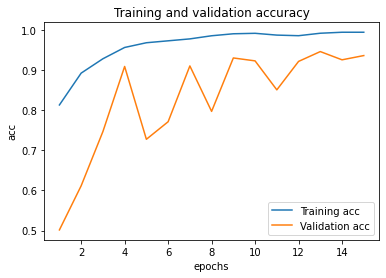

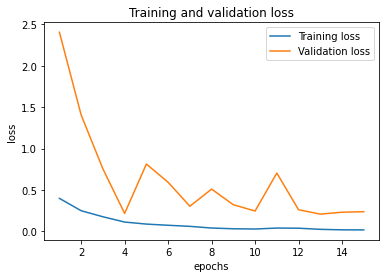

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()